# For sanity checking output of diurnal analysis results

In [82]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import ephem
from datetime import datetime, time, timedelta
from scipy import optimize
from mpl_toolkits.basemap import Basemap
from sys import getsizeof

import diurnal_config

# from diurnal_utils import *
%run diurnal_utils.py
%run model_by_model_analysis_helper.py
from fetch_model_helper import *

In [37]:
rel_data_dir = '/export/data1/cchristo/'

# raw output
input_data_dir_cm5 = rel_data_dir  + 'diurnal_analysis_results/CMIP5/' #GFDL-ESM2M/'
input_data_dir_cm6  = rel_data_dir + 'diurnal_analysis_results/CMIP6/' #GFDL-ESM4/'

# regridded data
input_data_dir_cm5_regridded = rel_data_dir  + 'diurnal_analysis_results/CMIP5_regridded/grid1/' #GFDL-ESM2M/'
input_data_dir_cm6_regridded  = rel_data_dir + 'diurnal_analysis_results/CMIP6_regridded/grid1/' #GFDL-ESM4/'

In [101]:
model_name = 'SAM0-UNICON'
ds_i = xr.open_dataset(input_data_dir_cm6 + model_name + '/' + '1985-01_2006-01_precip.nc')

In [22]:
# ds_i['phase_season']

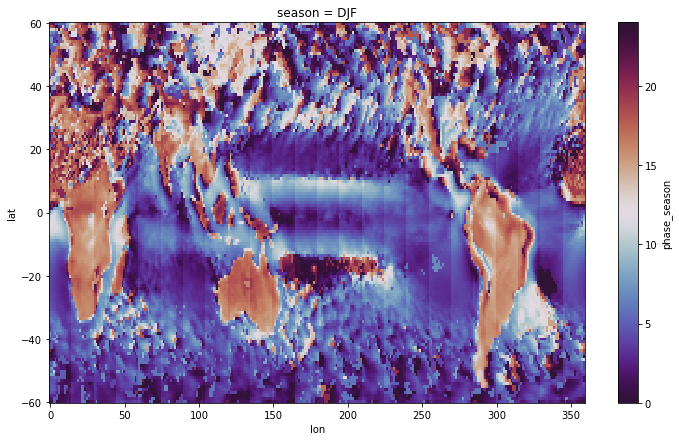

In [109]:
plt.figure(figsize = (12,7))
season_i = 0
ds_i_season = ds_i['phase_season'].isel(season = season_i)
# ds_i['phase_season'].isel(season = season_i).plot.hist(bins = 50)

ds_i_season.plot.imshow(vmin = 0, vmax = 24, 
                         cmap = plt.get_cmap('twilight_shifted'))


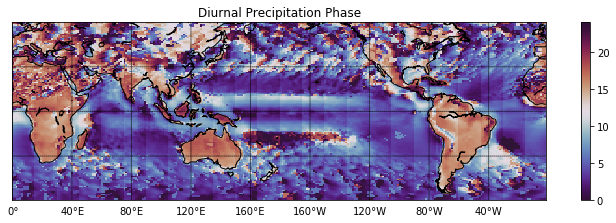

In [110]:

make_single_plot(ds_i_season, 
                 title = r'Diurnal Precipitation Phase',
                 cmap = plt.get_cmap('twilight_shifted'),
                 vmin = 0, vmax = 24)

(0, 6)

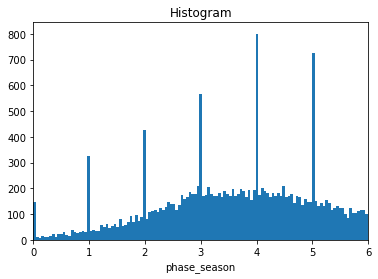

In [111]:
_ = ds_i_season.plot.hist(bins = 500)
plt.xlim([0,6])

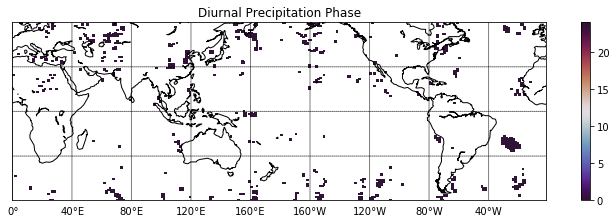

In [106]:
round_pres = 1
make_single_plot(ds_i_season.round(round_pres).where(ds_i_season.round(round_pres) == 24), 
                 title = r'Diurnal Precipitation Phase',
                 cmap = plt.get_cmap('twilight_shifted'),
                 vmin = 0, vmax = 24)

In [83]:
ds_i_year_mean = xr.apply_ufunc(phase_circmean, ds_i['phase_season'], 
#                                    kwargs = {'low' : 0.0, 'high' : 24.0},
                                   input_core_dims=[["season"]], 
                                   vectorize = True,
                                   dask = 'allowed')

In [94]:
# ds_i
seas_i

<xarray.DataArray 'season' ()>
array('DJF', dtype='<U3')
Coordinates:
    season   <U3 'DJF'

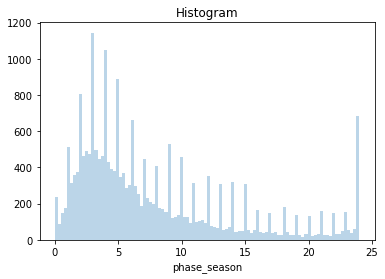

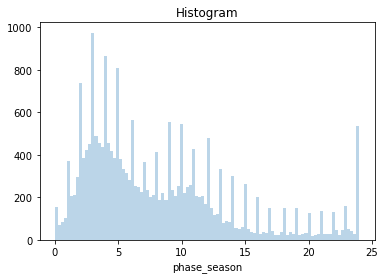

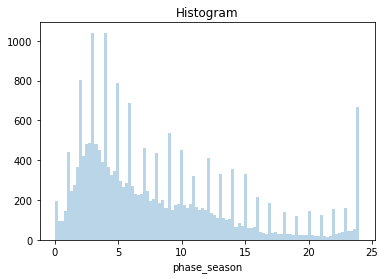

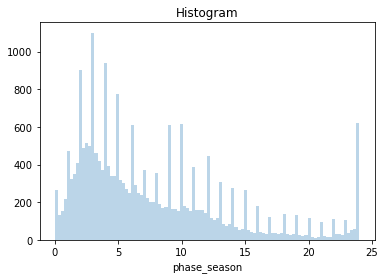

In [99]:
for seas_i in ds_i.season:
    plt.figure()
    _ = ds_i.sel(season = seas_i)['phase_season'].plot.hist(bins = 100, alpha = 0.3)

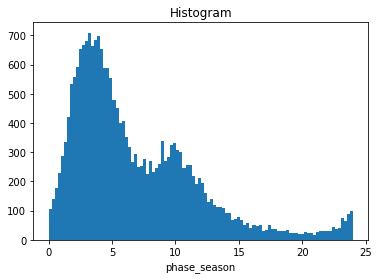

In [89]:
_ = ds_i_year_mean.plot.hist(bins = 100)
# make_single_plot(ds_i_year_mean, 
#                  title = r'Diurnal Precipitation Phase',
#                  cmap = plt.get_cmap('twilight_shifted'),
#                  vmin = 0, vmax = 24)